In [2]:
import tensorflow
import tensorflow_datasets as tfds
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [3]:
ds, ds_info = tfds.load('speech_commands', split='train', with_info=True)
#ds = ds.take(1)  # Only take a single example

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='speech_commands',
    version=0.0.2,
    description='An audio dataset of spoken words designed to help train and evaluate keyword
spotting systems. Its primary goal is to provide a way to build and test small
models that detect when a single word is spoken, from a set of ten target words,
with as few false positives as possible from background noise or unrelated
speech. Note that in the train and validation set, the label "unknown" is much
more prevalent than the labels of the target words or background noise.
One difference from the release version is the handling of silent segments.
While in the test set the silence segments are regular 1 second files, in the
training they are provided as long segments under "background_noise" folder.
Here we split these background noise into 1 second clips, and also keep one of
the files for the validation set.',
    homepage='https://arxiv.org/abs/1804.03209',
    features=FeaturesDict({
        'audio': Audio(shap

In [5]:
tfds.as_dataframe(ds.take(10), ds_info)

audio  label
0  [-15, -18, -12, -21, -22, -13, -21, -22, -13, ...      4
1  [75, 29, -85, 5, 68, -13, -61, 18, 60, -48, -3...      5
2  [0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, ...      7
3  [1, 15, 13, 11, 2, -19, -19, -11, -5, 14, 27, ...      5
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      7
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      2
6  [45, 82, 40, 9, -15, -52, -82, -100, -102, -10...     11
7  [29, 87, 151, 212, 279, 334, 319, 265, 187, 10...      7
8  [-12, -15, -20, -22, -25, -25, -32, -30, -39, ...      6
9  [-36, -66, -52, -52, -45, -35, -34, -41, -58, ...      6

In [6]:
ds2 = ds.take(10)
for example in ds2:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  audio = example["audio"]
  label = example["label"]
  print(audio.shape, audio)

['audio', 'label']
(16000,) tf.Tensor([-15 -18 -12 ...  16  21  25], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([  75   29  -85 ... -343  304  879], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([0 0 2 ... 2 1 1], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([ 1 15 13 ... 29 34 14], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([ 0  0  0 ...  1 -1  2], shape=(16000,), dtype=int64)
['audio', 'label']
(12456,) tf.Tensor([  0   0   0 ... -22 -59 -24], shape=(12456,), dtype=int64)
['audio', 'label']
(12632,) tf.Tensor([  45   82   40 ... -352 -371 -307], shape=(12632,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([ 29  87 151 ... 263 222 153], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([-12 -15 -20 ...  10  18   9], shape=(16000,), dtype=int64)
['audio', 'label']
(16000,) tf.Tensor([-36 -66 -52 ...  -1  -9   3], shape=(16000,), dtype=int64)


(0.0, 0.725578231292517, -22291.5, 22291.5)

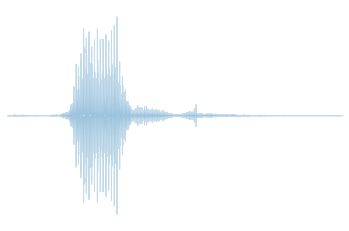

In [7]:
d = tfds.as_dataframe(ds.take(1))
dd = d.get('audio')
dd = dd[0].astype(dtype='float')
librosa.display.waveplot(dd, alpha=0.25, x_axis='off')
plt.axis('off')

Text(0.5, 1.0, 'Mel spectrogram')

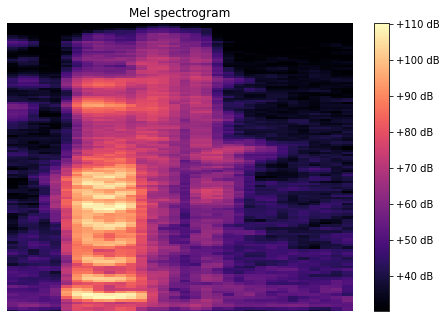

In [9]:
S = librosa.feature.melspectrogram(y=dd)
pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.specshow(librosa.power_to_db(S), y_axis='mel', x_axis='time')
plt.axis('off')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
# plt.tight_layout()